In [15]:
import pandas as pd
df=pd.read_csv("Student_Performance.csv")

In [16]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [17]:
df=df.drop_duplicates()
x=df.drop(['Performance Index'],axis=1)
y=df['Performance Index']

In [18]:
y.unique()

array([ 91.,  65.,  45.,  36.,  66.,  61.,  63.,  42.,  69.,  84.,  73.,
        27.,  33.,  68.,  43.,  67.,  70.,  30.,  71.,  85.,  57.,  35.,
        49.,  83.,  74.,  39.,  58.,  47.,  60.,  32.,  64.,  54.,  17.,
        53.,  75.,  52.,  78.,  38.,  98.,  87.,  41.,  81.,  15.,  88.,
        95.,  29.,  21.,  76.,  25.,  34.,  50.,  56.,  82.,  23.,  46.,
        92.,  77.,  86.,  44.,  94.,  40., 100.,  31.,  26.,  18.,  51.,
        72.,  16.,  28.,  89.,  48.,  37.,  62.,  59.,  19.,  79.,  22.,
        10.,  90.,  80.,  24.,  20.,  96.,  55.,  97.,  12.,  93.,  14.,
        99.,  11.,  13.])

In [19]:
for x in df.columns:
    print(x)
    print(df[x].unique())

Hours Studied
[7 4 8 5 3 6 2 1 9]
Previous Scores
[99 82 51 52 75 78 73 45 77 89 91 79 47 72 83 54 96 74 85 61 62 84 94 90
 44 70 67 97 59 55 68 63 46 76 43 81 93 98 48 92 64 88 60 87 40 69 80 95
 49 50 53 71 56 58 66 65 57 41 42 86]
Extracurricular Activities
['Yes' 'No']
Sleep Hours
[9 4 7 5 8 6]
Sample Question Papers Practiced
[1 2 5 6 0 8 3 4 9 7]
Performance Index
[ 91.  65.  45.  36.  66.  61.  63.  42.  69.  84.  73.  27.  33.  68.
  43.  67.  70.  30.  71.  85.  57.  35.  49.  83.  74.  39.  58.  47.
  60.  32.  64.  54.  17.  53.  75.  52.  78.  38.  98.  87.  41.  81.
  15.  88.  95.  29.  21.  76.  25.  34.  50.  56.  82.  23.  46.  92.
  77.  86.  44.  94.  40. 100.  31.  26.  18.  51.  72.  16.  28.  89.
  48.  37.  62.  59.  19.  79.  22.  10.  90.  80.  24.  20.  96.  55.
  97.  12.  93.  14.  99.  11.  13.]


In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Extracurricular Activities"]=le.fit_transform(df["Extracurricular Activities"])  
print(df["Extracurricular Activities"].unique())

[1 0]


In [21]:
x=df.drop(['Performance Index'],axis=1)
y=df['Performance Index']

# EDA on Student Performance Dataset

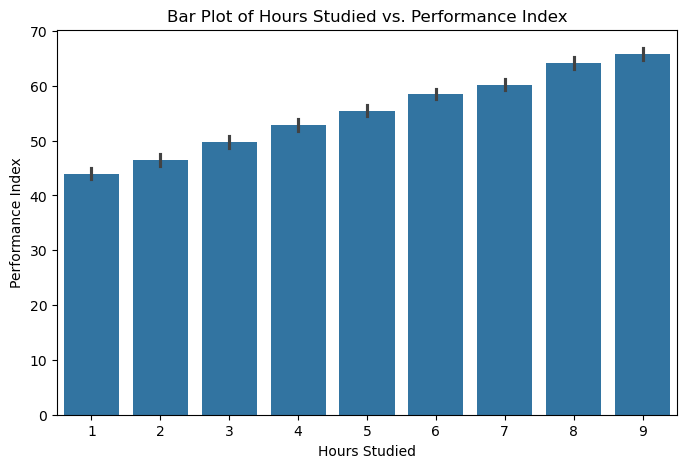

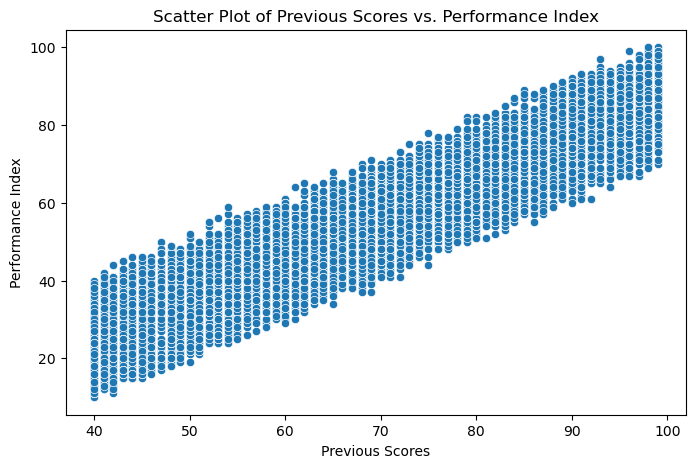

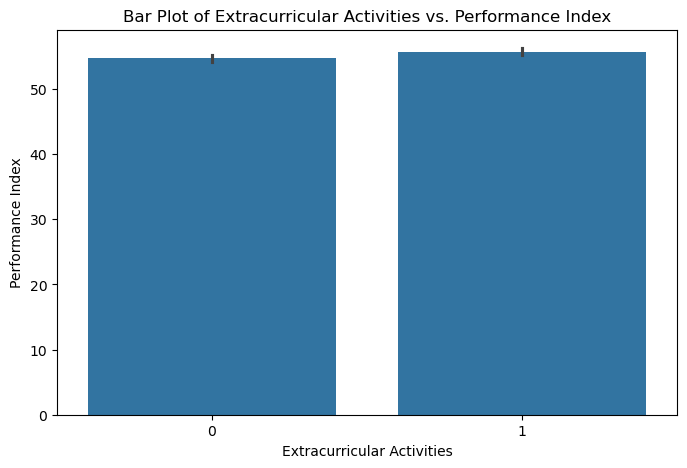

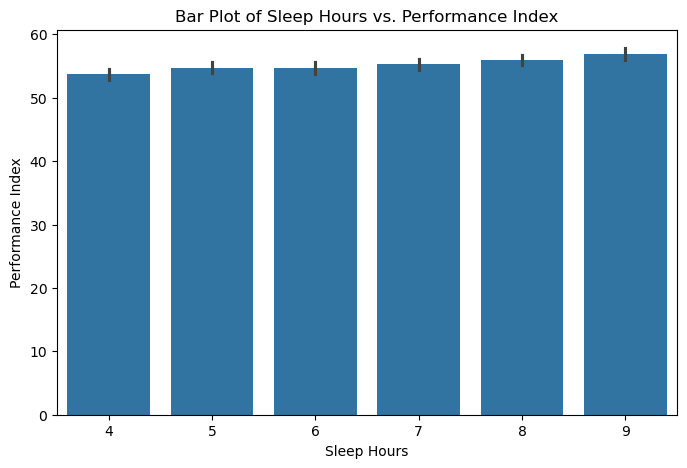

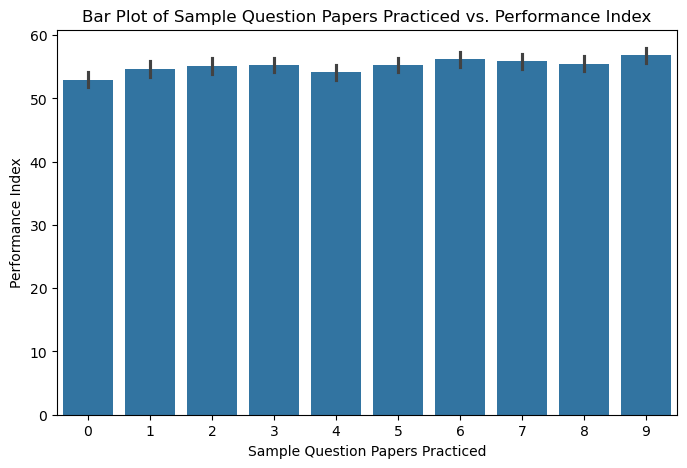

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
features = df.columns.drop('Performance Index') 
for feature in features:
    plt.figure(figsize=(8, 5))
    if feature=="Previous Scores":
        sns.scatterplot(x=df[feature], y=df['Performance Index'])
        plt.title(f'Scatter Plot of {feature} vs. Performance Index')
        plt.xlabel(feature)
        plt.ylabel('Performance Index')
    else:
        sns.barplot(x=df[feature], y=df['Performance Index'])
        plt.title(f'Bar Plot of {feature} vs. Performance Index')
        plt.xlabel(feature)
        plt.ylabel('Performance Index')
    plt.show()



# Support Vector Regresssion

In [23]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x=st.fit_transform(x)

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

In [25]:
from sklearn.svm import SVR
svr=SVR()

In [26]:
svr.fit(x_train,y_train)

SVR()

In [27]:
y_pred=svr.predict(x_test)
from sklearn.metrics import r2_score,mean_absolute_error
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.9844640106598493
1.8493534706617145


In [28]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['rbf'],
              "epsilon" : [0.01, 0.1, 0.5],
              "gamma" : ['scale', 'auto', 0.1, 1, 10]
}

In [29]:
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 1,n_jobs=-1)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'epsilon': [0.01, 0.1, 0.5],
                         'gamma': ['scale', 'auto', 0.1, 1, 10],
                         'kernel': ['rbf']},
             verbose=1)

In [30]:
grid.best_params_

{'C': 100, 'epsilon': 0.5, 'gamma': 0.1, 'kernel': 'rbf'}

In [32]:
y_pred=grid.predict(x_test)
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.9873736991609823
1.6857027621770715
